# Принятие решений в бизнесе на основе данных

### Описание проекта
##### Контекст
Вы — аналитик крупного интернет-магазина.   
Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.  
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

<a id="contents"></a>
#### Оглавление
* [Часть 1. Приоритизация гипотез.](#gipothesis)
    * [Фреймворк ICE](#ICE)
    * [Фреймворк RICE](#RICE)
    * [Вывод](#final1)
* [Часть 2. Анализ A/B-теста](#A/B_test)
    * [Знакомство с данными](#first_look)
    * [Кумулятивные показатели](#cum_rev)
       * [Выручка](#cum_rev)
       * [Средний чек](#cum_bill)
       * [Относительный средний чек](#cum_bill_ratio)
       * [Конверсия](#convert)
       * [Относительная конверсия](#convert_ratio)
    * [Количество заказов/посетителей](#order_visit)
    * [Стоимость заказов](#order_rev)
    * [Статистические тесты до обработки](#statistic)
        * [Конверсия](#stat_convert)
        * [Средний чек](#stat_bill)
    * [Статистические тесты после обработки](#statistic_clear)
        * [Конверсия](#stat_clear_conv)
        * [Средний чек](#stat_clear_bill)
    * [Итоги А/В теста](#final2)
    * [Общий вывод](#total_final)

### Часть 1. Приоритизация гипотез. <a id="gipothesis"></a>
##### Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

[Оглавление](#contents)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
import numpy as np
from scipy import stats as st
from IPython.core.display import display, HTML
# На всю ширину экрана
#display(HTML("<style>.container { width:100% !important; }</style>"))
# чтоб предупреждения на отвлекали
import warnings
warnings.simplefilter("ignore")
pd.set_option("display.max_colwidth", 120)


Загружаем и изучаем данные.

In [3]:
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
for i in range(len(data)):
    print(data.loc[i, 'Hypothesis'])

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Запустить собственную службу доставки, что сократит срок доставки заказов
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Запустить акцию, дающую скидку на товар в день рождения


In [4]:
data.columns = data.columns.str.lower()

Проведем процедуру приоритизации гипотез фреймворком ICE <a id="ICE"></a>

[Оглавление](#contents)

In [5]:
# Добавляем столбец ICE
data['ICE'] = ((data['impact'] * data['confidence']) / data['efforts']).round(2)
display(data[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<a id="RICE"></a>
Проведем процедуру приоритизации гипотез фреймворком RICE

[Оглавление](#contents)

In [6]:
data['RICE'] = (data['impact'] * data['confidence'] * data['reach']) / data['efforts']
display(data[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<a id="final1"></a>
Первую строчку в рейтинге ICE заняла гипотеза (хотя, судя по формулировке, я бы назвал ее предполагаемой задачей) `Запустить акцию, дающую скидку на товар в день рождения`. Она не требует больших усилий в проверке, и имеет высокие оценки Confidence и Impact.  
Во фреймворке RICE на первое место выходит `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок` за счет высокого показателя Reach - эта гипотеза достучится до каждого пользователя.  
Считаю, что гипотеза про акцию в день рождения заслуженно опустилась на 5-е место - она будет интересна только тем пользователям, у которых будет ДР в ближайшее время.  
Закономерно гипотеза `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей` находится в верхней части таблицы (2-е и 3-е место), я бы советовал к ней присмотреться.  
Гипотеза об изменении цвета фона главного экрана имеет самые низкие показатели по всем параметрам. Думаю Reach мог бы быть и повыше, разве мало пользователей заходит на главную страницу?  
Думаю фреймворк RICE более объективен, охват пользователей - очень важный параметр. 

[Оглавление](#contents)

### Часть 2. Анализ A/B-теста <a id="A/B_test"></a>
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
##### Задача
Проанализируйте A/B-тест:  

[Оглавление](#contents)

Загрузим данные и ознакомимся. <a id="first_look"></a>

In [6]:
orders = pd.read_csv('/datasets/orders.csv', parse_dates = ['date'])
orders.columns = ['order_id', 'uid', 'date', 'revenue', 'group']
orders.head()

,order_id,uid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
users = pd.read_csv('/datasets/visitors.csv', parse_dates = ['date'])
users = users.rename(columns = {'visitors' : 'users'})
users.head()

,date,group,users
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
def df_info(df):
    """вывод базовой информации по датафрейму"""
    df.info()
    display(df.describe(include='all'))
    display(df.sample(10))

In [10]:
df_info(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date     62 non-null datetime64[ns]
group    62 non-null object
users    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,users
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-02 00:00:00,A,NaN
freq,2,31,NaN
first,2019-08-01 00:00:00,NaN,NaN
last,2019-08-31 00:00:00,NaN,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000


,date,group,users
32,2019-08-02,B,581
53,2019-08-23,B,546
12,2019-08-13,A,748
10,2019-08-11,A,718
21,2019-08-22,A,609
27,2019-08-28,A,594
26,2019-08-27,A,711
8,2019-08-09,A,617
24,2019-08-25,A,621
1,2019-08-02,A,619


In [11]:
df_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
order_id    1197 non-null int64
uid         1197 non-null int64
date        1197 non-null datetime64[ns]
revenue     1197 non-null int64
group       1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,order_id,uid,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1.197000e+03,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05 00:00:00,NaN,B
freq,NaN,NaN,48,NaN,640
first,NaN,NaN,2019-08-01 00:00:00,NaN,NaN
last,NaN,NaN,2019-08-31 00:00:00,NaN,NaN
mean,2.155621e+09,2.165960e+09,NaN,8.348006e+03,NaN
std,1.229085e+09,1.236014e+09,NaN,3.919113e+04,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000e+01,NaN
25%,1.166776e+09,1.111826e+09,NaN,1.220000e+03,NaN


,order_id,uid,date,revenue,group
932,4149397657,2902041511,2019-08-27,720,A
406,1441855393,1404934699,2019-08-03,26980,B
148,4238948438,363280180,2019-08-01,300,B
710,619615697,582460750,2019-08-20,10550,B
795,4230875336,2669052850,2019-08-10,2578,B
890,1192185169,2853587382,2019-08-21,30649,B
924,3778001764,47206413,2019-08-10,730,B
1196,3936777065,2108080724,2019-08-15,202740,B
70,3574407166,2328378067,2019-08-01,8999,B
298,161113724,3463388890,2019-08-24,2950,B


Имеем данные по результатам А/В теста, который проводился на протяжении августа 2019 года.   
Количество посетителей в каждой группе на каждый день, суммы конкретных заказов, когда и кем они совершены, в какой группе теста находился покупатель.  
Всего за этот период совершено 1197 заказов.

Перед тем как приступать к анализу проведем небольшое исследование, правильно ли собраны данные?  
Как распределены заказы по группам?  

In [12]:
orders.groupby('group')['uid'].nunique()

group
A    503
B    586
Name: uid, dtype: int64

Количество заказов отличается,  
Нет ли пользователей, которые попали и обе группы теста?  
Сгруппируем по id пользователя и подсчитаем количество уникальных групп для пользователя.

In [8]:
group_count = orders.groupby('uid')['group'].nunique().reset_index()
double_group = group_count[group_count['group'] == 2]
double_group.sample(5)

,uid,group
897,3717692402,2
316,1316129916,2
622,2600415354,2
662,2716752286,2
661,2712142231,2


58 пользователей попали в обе группы.  
Сколько заказов они совершили?

In [14]:
print('Количество заказов пользователей включенных в обе группы: ', len(orders[orders['uid'].isin(double_group['uid'])]))

Количество заказов пользователей включенных в обе группы:  181


In [15]:
print('Заказы пользователей попавших в обе группы теста составили {:.1%} от общего числа заказов.'.format(181 / 1197, 2))

Заказы пользователей попавших в обе группы теста составили 15.1% от общего числа заказов.


Можно посмотреть в какую группу попал пользователь первоначально. И далее перевести его в определенную группу.

In [16]:
# в какую группу пользователь попал при первом заказе
group_first = orders.groupby('uid').agg(group_first = ('group', 'first')).reset_index()

# выборка пользователей попавших в обе группы 
orders_new = orders.merge(group_first, how = 'left', on = 'uid')
orders_new

,order_id,uid,date,revenue,group,group_first
0,3667963787,3312258926,2019-08-15,1650,B,B
1,2804400009,3642806036,2019-08-15,730,B,B
2,2961555356,4069496402,2019-08-15,400,A,A
3,3797467345,1196621759,2019-08-15,9759,B,B
4,2282983706,2322279887,2019-08-15,2308,B,B
...,...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B,B
1193,2203539145,370388673,2019-08-14,3190,A,A
1194,1807773912,573423106,2019-08-14,10550,A,A
1195,1947021204,1614305549,2019-08-14,100,A,B


Признаем данные учебными и приступим к анализу результатов теста без корректировок.

###### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения. <a id="cum_rev"></a>

Подготовим данные для постройки графика.

In [10]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

In [11]:
# получаем агрегированные по дням кумулятивные данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                    orders['group'] == x['group'])].\
                    agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', 'uid' : 'nunique', 'revenue' : 'sum'}),\
                    axis=1).sort_values(by=['date', 'group'])
orders_aggregated.head()

,date,group,order_id,uid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [13]:
# получаем агрегированные по дням кумулятивные  данные о посетителях интернет-магазина 
users_aggregated = dates_groups.apply(lambda x: users[np.logical_and(users['date'] <= x['date'], users['group'] == x['group'])].\
                                         agg({'date' : 'max', 'group' : 'max', 'users' : 'sum'}), axis=1).\
                                            sort_values(by=['date','group'])
users_aggregated.head()

,date,group,users
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [14]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(users_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Строим графики кумулятивной выручки по дням

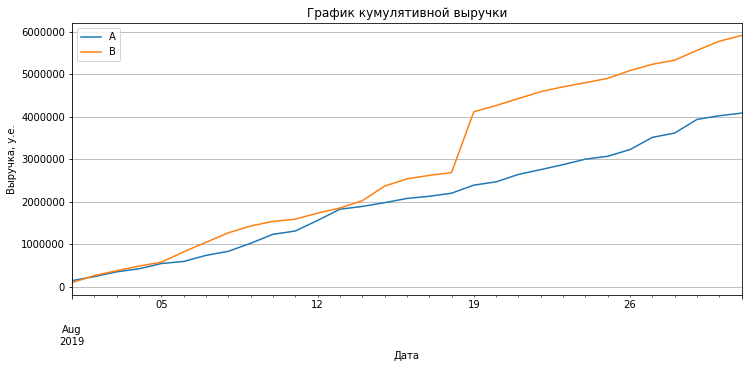

In [15]:
ax = cumulative_data[cumulative_data['group'] == 'A'].plot(x = 'date', y = 'revenue', label = 'A', figsize = (12, 5),\
                                                           title = 'График кумулятивной выручки')
cumulative_data[cumulative_data['group'] == 'B'].plot(x = 'date', y = 'revenue', label = 'B', figsize = (12, 5), grid = 1, ax = ax)
plt.xlabel('Дата')
plt.ylabel('Выручка, у.е.')
plt.show()

Выручка по группе "А" увеличивается равномерно, в группе "В" наблюдается сильный всплеск примерно 18.08. Это может быть выброс - или много заказов в один день, или очень дорогие заказы.

###### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения. <a id="cum_bill"></a>
Рассчитаем куммулятивный средний чек.

In [16]:
cumulative_data['revenue_mean'] = cumulative_data['revenue'] / cumulative_data['orders']

Для удобства построения графиков создадим датафреймы по группам. 

In [18]:
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

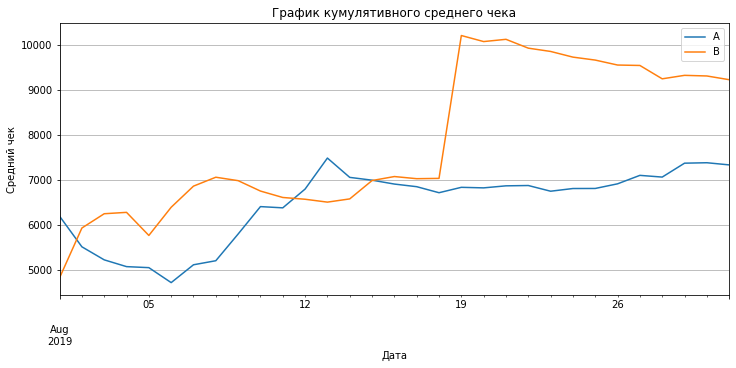

In [19]:
# Строим график среднего чека
ax = cumulative_data_A.plot(x = 'date', y = 'revenue_mean', label = "A", title = 'График кумулятивного среднего чека')
cumulative_data_B.plot(x = 'date', y = 'revenue_mean', label = "B", ax = ax, grid = 1)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

Снова видим тот же выброс 18.08 в группе "В". Значит выброс скорее всего вызван аномально дорогими заказами. Если бы это было количество заказов, роста не должно быть, наоборот падение.  
Для  группы "А" средний чек примерно с середины месяца установился на уровне 7000.  
В общем средний чек группы "В" выше.

###### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения. <a id="cum_bill_ratio"></a>

Объединим данные для расчета относительного среднего чека. И добавим колонку 'B/A_revenue' в котрой и сохраним отношение

In [20]:
cumulative_revenue_A_B = cumulative_data_A[['date', 'revenue_mean']].merge(cumulative_data_B[['date', 'revenue_mean']],\
                                                                           on = 'date', suffixes = ['_A', '_B'])

cumulative_revenue_A_B['B/A_revenue'] = (cumulative_revenue_A_B['revenue_mean_B'] / cumulative_revenue_A_B['revenue_mean_A']) - 1
cumulative_revenue_A_B.head()

,date,revenue_mean_A,revenue_mean_B,B/A_revenue
0,2019-08-01,6190.791667,4819.857143,-0.221447
1,2019-08-02,5509.113636,5927.733333,0.075987
2,2019-08-03,5218.735294,6245.836066,0.196810
3,2019-08-04,5067.845238,6276.500000,0.238495
4,2019-08-05,5045.110092,5762.326733,0.142161


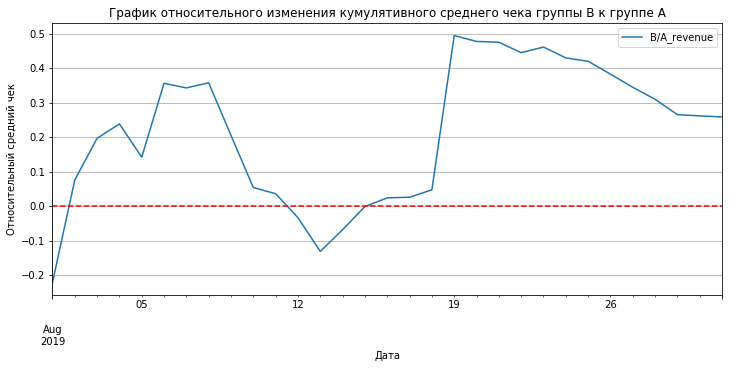

In [21]:
# Строим график
cumulative_revenue_A_B.plot(x = 'date', y = 'B/A_revenue', grid = 1,\
                            title = 'График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительный средний чек')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

Снова видим 'скачки' графика и снова дата 18.08.   
Группа "В" явно показывает более высокие суммы чеков.

###### 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения. <a id="convert"></a>

Расчитаем кумулятивную конверсию для каждой группы в своем датафрейме, затем объединим их и построим график.

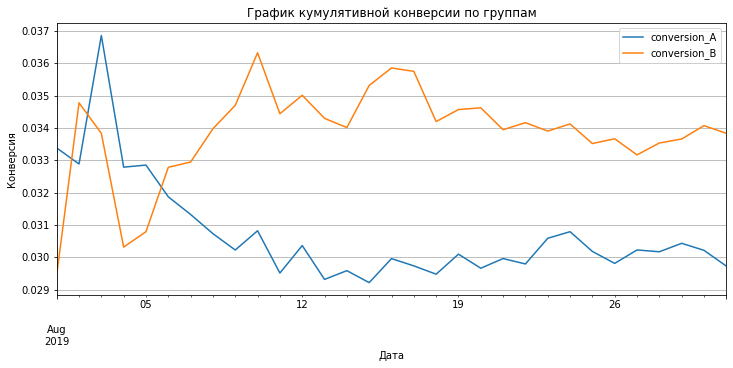

In [22]:
cumulative_data_A['conversion'] = cumulative_data_A['orders'] / cumulative_data_A['visitors']
cumulative_data_B['conversion'] = cumulative_data_B['orders'] / cumulative_data_B['visitors']
cumulative_conversion = cumulative_data_A[['date', 'conversion']].merge(cumulative_data_B[['date', 'conversion']],\
                                                                        on = 'date', suffixes = ['_A', '_B'])
cumulative_conversion.plot(x = 'date', grid = 1, title = 'График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

В начале теста конверсии сильно колебались, ближе к завершению конверсия группы "А" зафиксировалась на уровне 0,03, группы "В" - 0,033 - 0,034.

###### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения. <a id="convert_ratio"></a>

Расчитаем отношение конверсии группы "В" к конверсии группы "А" и добавим новый столбец.  
Затем построим график изменений во времени.

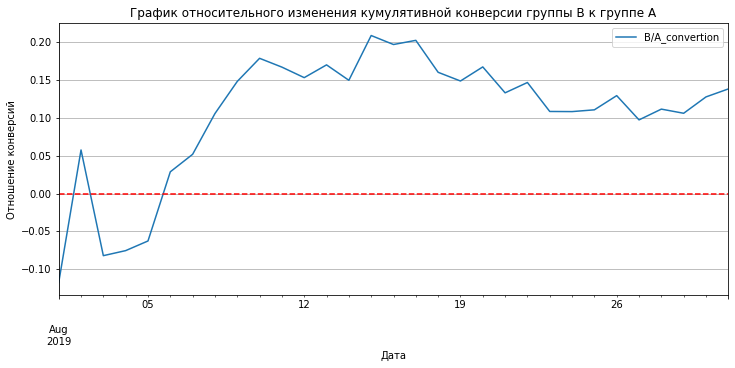

In [23]:
cumulative_conversion['B/A_convertion'] = (cumulative_conversion['conversion_B'] / cumulative_conversion['conversion_A']) - 1
cumulative_conversion.plot(x = 'date', y = 'B/A_convertion', grid = 1, \
                           title = 'График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение конверсий')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

Уже к пятому дню эксперимента конверсия группы "В" лучше чем в группе "А" и остается такой до конца.  
Думаю, можно считать отношение конверсий установившимся на уровне 0,125 )

###### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения. 
<a id="order_visit"></a>

Сгруппируем таблицу по пользователям с расчетом количества заказов на каждого пользователя.  
Построим точечный график.

In [25]:
orders.groupby('uid', as_index = 0).agg({'order_id' : 'nunique'}).head()

,uid,order_id
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


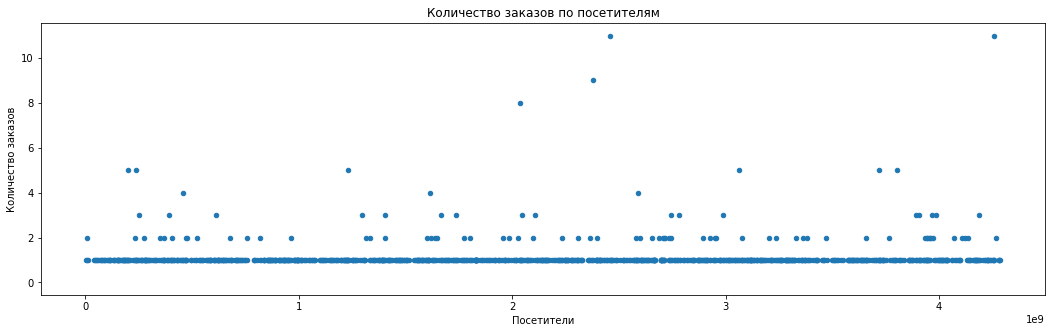

In [26]:
orders.groupby('uid', as_index = 0).agg({'order_id' : 'nunique'}).plot(kind='scatter', x = 'uid', y = 'order_id',\
                                    figsize = (18, 5), title = 'Количество заказов по посетителям')
plt.xlabel('Посетители')
plt.ylabel('Количество заказов')
plt.axhline(y = 0, color = 'w')
plt.show()

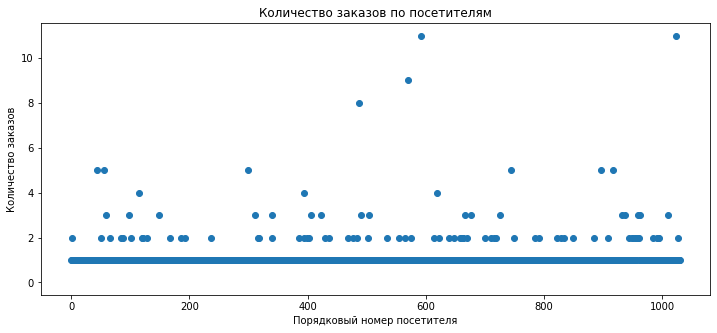

In [28]:
# Поправляем отображение оси Х
orders_by_users = orders.groupby('uid', as_index=False).agg(
    {'order_id': 'nunique'})
 
orders_by_users = orders_by_users.rename(columns={'order_id':'orders_number'})

# диаграмма рассеяния количества заказов по пользователям
x_values_orders = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values_orders, orders_by_users['orders_number'])
plt.title('Количество заказов по посетителям')
plt.xlabel('Порядковый номер посетителя')
plt.ylabel('Количество заказов')
plt.axhline(y = 0, color = 'w')
plt.show()

Подавляющее большинство людей заказывали только 1 раз, но есть и те, кто заказал 11 раз )

###### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [29]:
print(np.percentile(orders.groupby('uid', as_index = 0).agg({'order_id' : 'nunique'})['order_id'], [95, 99]))

[2. 4.]


Расчет показыает, что не более 5% пользвателей совершали более 2 заказов. И только 1% делал более 4 заказов.  
Поскольку обычно считается приемлемым для отсечения выбросов обрезать до 5% имеющихся данных, предлагаю оставить только тех пользователей, которые делали 1 и 2 заказа.

<a id="order_rev"></a>
###### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Строим график по колонке 'revenue'. Для наглядности сразу ограничим шкалу y до 100 000 у.е.(цифра найдена экспериментальным путем.)

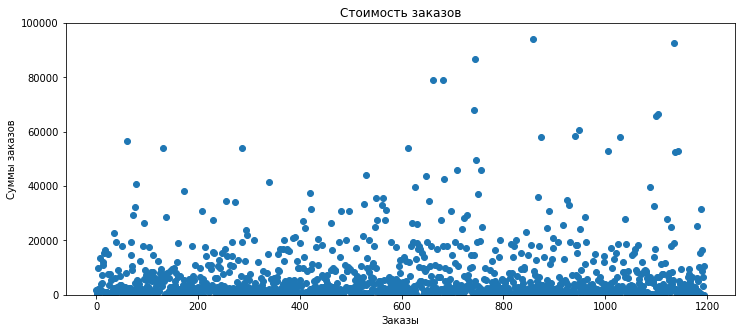

In [30]:
x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.xlabel('Заказы')
plt.ylabel('Суммы заказов')
plt.title('Стоимость заказов')
plt.show()

График свидетельствует о большом скоплении заказов в границах от 0 до 20 000 у.е. Чтоб точно определить границы выбросов нужно расчитать персентили.

###### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [31]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Лишь 5% заказов оказались дороже 28 000 у.е. и 1% дороже 58 233 у.е.  
Так же как и по количеству заказов, я бы убрал 5% - все что дороже 28 000 у.е.

###### 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
<a id="statistic"></a> 
<a id="stat_convert"></a>

Создадим списки пользователей по группам с числом их заказов и списки количества пользователей в день (тоже по группам).

In [32]:
orders_by_users_A = orders[orders['group']=='A'].groupby('uid', as_index=False).agg({'order_id' : 'nunique'})
orders_by_users_A.columns = ['uid', 'orders']

orders_by_users_B = orders[orders['group']=='B'].groupby('uid', as_index=False).agg({'order_id' : pd.Series.nunique})
orders_by_users_B.columns = ['uid', 'orders']

users_A_daily = users[users['group'] == 'A']
users_B_daily = users[users['group'] == 'B']

Подготовим данные для проверки критерием Манна-Уитни: объявим переменные sample_a и sample_b в которых пользователям будет соответствовать количество заказов, причем, тем, кто ничего не заказал, присвоим "0".

In [33]:
sample_A = pd.concat([orders_by_users_A['orders'],pd.Series(0, index = np.arange(users_A_daily['users'].sum() - len(orders_by_users_A)),\
                                                           name = 'orders')], axis = 0)

sample_B = pd.concat([orders_by_users_B['orders'],pd.Series(0, index = np.arange(users_B_daily['users'].sum() - len(orders_by_users_B)),\
                                                            name = 'orders')], axis = 0)
print(sample_A, sample_B)

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64 0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64


Применим "U-критерий Манна-Уитни". При выводе результата округлим до 5-и знаков после запятой.  
Н0 (Нулевая гипотеза) - в конверсии между группами по «сырым» данным нет значимой разницы  
Н1 (Альтернативная гипотеза) - в конверсии между группами есть значимая разница

In [34]:
print("P-value = {0:.5f}".format(st.mannwhitneyu(sample_A, sample_B)[1]))

P-value = 0.00840


P-value меньше 0,05 - вывод: 
###### В конверсии между группами есть значимая разница.
Расчитаем относительный прирост конверсии группы "В" по сравнению с "А"

In [35]:
print("Относительный прирост конверсии группы 'B' {0:.2%}".format(sample_B.mean()/sample_A.mean()-1))

Относительный прирост конверсии группы 'B' 13.81%


Конверсия группы "В" на 13.81% выше чем в группе "А"

###### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
<a id="stat_bill"></a>

Передадим критерию Манна-Уинтни даные о суммах заказов.  
Н0 (Нулевая гипотеза) - средний чек между группами по «сырым» данным не отличается  
Н1 (Альтернативная гипотеза) - в среднем чеке между группами по «сырым» данным есть значимая разница

In [36]:
print("P-value = {0:.5f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

P-value = 0.36465


P-value значительно больше 0.05:
###### Средний чек между группами по «сырым» данным не отличается
Рассчитаем относительные различия в среднем чеке:

In [37]:
print("{0:.2%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

25.87%


Хотя статистической разницы не обнаружено, среднее значение чека в группе "В" почти на 26% выше.

###### 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
<a id="statistic_clear"></a>
<a id="stat_clear_conv"></a>

Проведем очистку данных.   
Исключим из ранее полученных выборок sample_a и sample_b пользователей которые сделали более 2 заказов (уберем 5% данных).

In [38]:
sample_A_filtred = pd.DataFrame(sample_A)
sample_A_filtred = sample_A_filtred[sample_A_filtred['orders'] <= 3]
sample_B_filtred = pd.DataFrame(sample_B)
sample_B_filtred = sample_B_filtred[sample_B_filtred['orders'] <= 3]

Передадим полученные данные в метод `mannwhitneyu()`  
Сформулируем гипотезы:  
Н0 (Нулевая гипотеза) - в конверсии между группами по «очищенным» данным нет значимой разницы  
Н1 (Альтернативная гипотеза) - в конверсии между группами по «очищенным» данным есть значимая разница

In [39]:
print("P-value = {0:.5f}".format(st.mannwhitneyu(sample_A_filtred['orders'], sample_B_filtred['orders'])[1]))

P-value = 0.00805


Очистка данных практически не повлияла на результаты теста по конверсии. По прежнему статистическая разница в конверсии есть.  
###### Отвергнуть нулевую гипотезу не получилось.

In [40]:
print("Относительный прирост конверсии группы 'B' {0:.2%}".format(sample_B_filtred['orders'].mean() / sample_A_filtred['orders'].mean()-1))

Относительный прирост конверсии группы 'B' 14.99%


Прирост конверсии "В" относительно "А" остался на том же уровне. Теперь мы видим, что конверсия "В" лучше на 15%

###### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
<a id="stat_clear_bill"></a>

Как было ранее сказано, исходя из расчетов персентилей, считаем аномальными заказы дороже 28 000 у.е. Исключим их для расчета статистической значимости.

Формулируем гипотезы:  
Н0 (Нулевая гипотеза) - средний чек между группами по «очищенным» данным не отличается  
Н1 (Альтернативная гипотеза) - в среднем чеке между группами по «очищенным» данным есть значимая разница

In [41]:
print("P-value = {0:.5f}".format(st.mannwhitneyu(orders[(orders['group'] == 'A') & (orders['revenue'] < 28000)]['revenue'],\
                                                 orders[(orders['group'] == 'B') & (orders['revenue'] < 28000)]['revenue'])[1]))

P-value = 0.42594


P-value по очищенным данным все еще значительно выше 0.05 - нулевую гипотезу не отвергаем.  
###### Средний чек в гуппах не отличается

In [42]:
print("{0:.2%}".format(orders[(orders['group'] == 'B') & (orders['revenue'] < 28000)]['revenue'].mean() / orders[(orders['group'] == 'A') & (orders['revenue'] < 28000)]['revenue'].mean()-1))

-1.62%


Средний чек на "очищенных" данных у группы "А" выше на 1.62%

###### 14. Примите решение по результатам теста и объясните его. 
<a id="final2"></a>

Подведем итог:  
На графиках мы увидели:  
- Кумулятивная выручка группы "В" с 5-го дня проведения теста стабильно выше чем в гр. "А"
- Кумулятивный средний чек в группе "В" выше почти на протяжении всего теста.
- Кумулятивная конверсия в группе "В" с 5-го дня стабильно выше чем в "А"
По результатам статистического теста:  
После очистки данных от выбросов мы отметили:  
- наличие статистически значимых различий в конверсии. Причем в пользу группы "В" на 15%.
- отсутствие статистически значимых различий в средних чеках. И проигрыш группы "В" в этой дисциплине на 1.62% 
Думаю, если из данных убрать заказы признанные выбросами, кумулятивные показатели Группы "В" останутся выше.  
Основная цель исследования - увеличение выручки. Если конверсия вырастет на 15%, выручка вырастет не смотря на отставание гр. "В" в среднем чеке на 1.62%.  
###### Тест останавливаем, гр. "В" признаем победителем.

### Общий вывод
<a id="total_final"></a>

Про выбор гипотезы:  
Рекомендую истользовать фреймворк RICE т.к. он учитывает охват аудитории. Если применять фреймворк ICE можно выбрать не самую эффективную гипотезу. В итоге лидируют гипотезы:  
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   	
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
  
  Про А/В тест:  
  В результате применения выбранной гипотезы конверсия выросла на 15%, средний чек остался почти на том же уровне. Стоит внедрять выбранное решение в полном масштабе.